## Atmospheric Carbon Dioxide Dry Air Mole Fractions from quasi-continuous measurements at Mauna Loa, Hawaii.

In [48]:
from pathlib import Path
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")
Path.cwd()
data_dir = (Path.cwd().parent / ".data").resolve()
assert data_dir.exists()

In [49]:
list(f"{pth.stem}{pth.suffix}" for pth in data_dir.glob("*"))

['sea_ice_n.csv',
 'co2_mlo_surface-insitu_1_ccgg_DailyData.csv',
 'rad_muc_hirsch.csv',
 'prison_population.csv',
 'co2_mlo_surface-insitu_1_ccgg_DailyData_no_meta.csv',
 'rad_muc_margareten.csv',
 'co2_spo.csv',
 'sea_ice_s.csv']

In [53]:

df = (
    pd.read_csv(
        data_dir / "co2_mlo_surface-insitu_1_ccgg_DailyData.csv",
        delim_whitespace=True,
        header=158,
    )
    .assign(date=lambda df: pd.to_datetime(df['datetime']))
    .drop(columns=["year", "month", "day", "hour", "minute", "second", "datetime", "time_decimal", "midpoint_time"]) # drop redundant cols
    # replace invalid values with NaN
    .assign(
        **{
            col: lambda df, col=col: df[col].where(df[col] >= 0) for col in ("value", "value_std_dev", "intake_height")
        }
    )
)

df.head()

/var/folders/yl/_h6j91qd4d30w8vyy7hnlvjh0000gn/T/ipykernel_66976/4209192804.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  pd.read_csv(


,site_code,value,value_std_dev,nvalue,latitude,longitude,altitude,elevation,intake_height,qcflag,date
0,MLO,NaN,NaN,0,19.536,-155.576,3387.1,3397.0,NaN,*..,1974-01-01 00:00:00+00:00
1,MLO,NaN,NaN,0,19.536,-155.576,3387.1,3397.0,NaN,*..,1974-01-02 00:00:00+00:00
2,MLO,NaN,NaN,0,19.536,-155.576,3387.1,3397.0,NaN,*..,1974-01-03 00:00:00+00:00
3,MLO,NaN,NaN,0,19.536,-155.576,3387.1,3397.0,NaN,*..,1974-01-04 00:00:00+00:00
4,MLO,NaN,NaN,0,19.536,-155.576,3387.1,3397.0,NaN,*..,1974-01-05 00:00:00+00:00


Text(0.5, 0, 'Date')

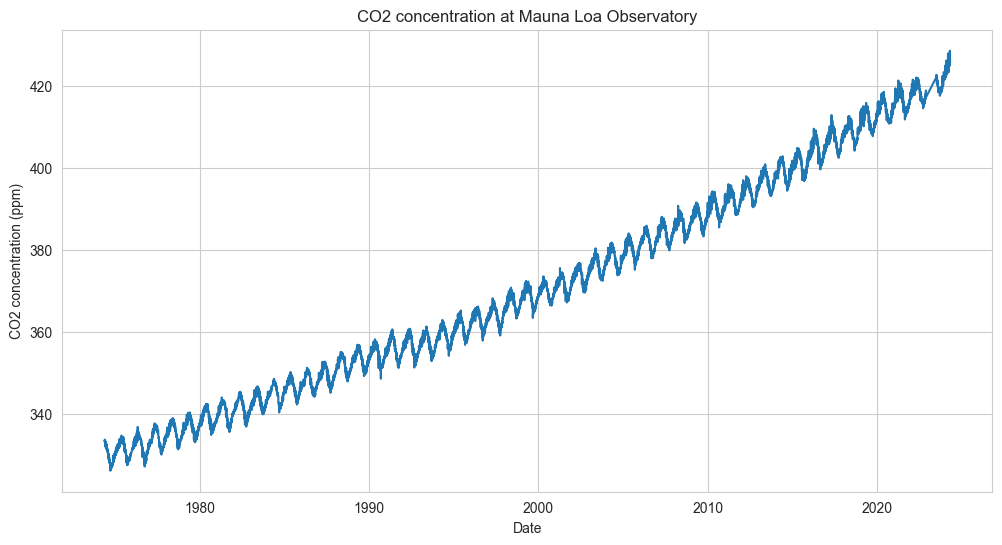

In [66]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="date", y="value")
plt.title("CO2 concentration at Mauna Loa Observatory")
plt.ylabel("CO2 concentration (ppm)")
plt.xlabel("Date")

<Figure size 1200x600 with 0 Axes>

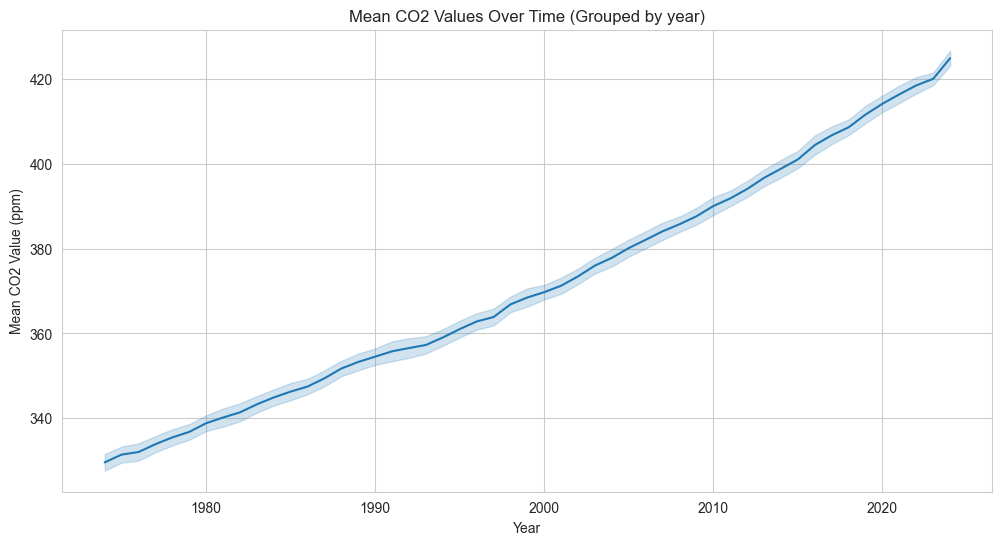

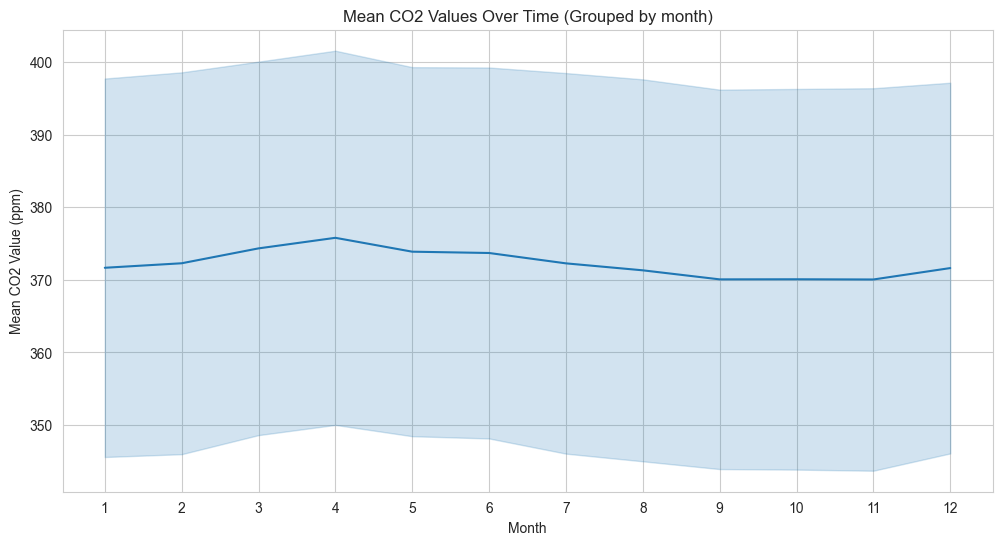

In [83]:
grouped_df = (
    df.groupby([df["date"].dt.year, df["date"].dt.month, df["date"].dt.day])
    .agg({"value": ["mean", "std"]})
    .rename_axis(["year", "month", "day"])
    .reset_index()
)

for time_col in ("year", "month"):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=grouped_df, x=time_col, y=("value", "mean"), errorbar="sd")
    plt.title(f"Mean CO2 Values Over Time (Grouped by {time_col})")
    plt.xlabel(time_col.capitalize())
    plt.ylabel("Mean CO2 Value (ppm)")

    if time_col == "month":
        plt.xticks(ticks=range(1, 13), labels=range(1, 13))

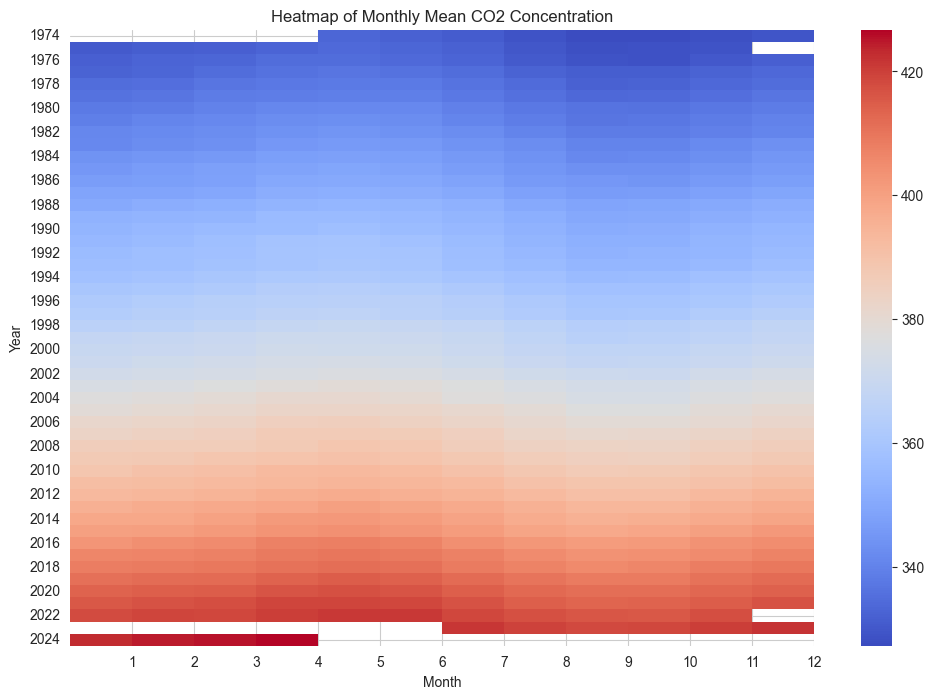

In [79]:
monthly_means = df.groupby([df['date'].dt.year, df['date'].dt.month]).agg({'value': 'mean'}).unstack()


plt.figure(figsize=(12, 8))
sns.heatmap(monthly_means, cmap="coolwarm", annot=False)
plt.title('Heatmap of Monthly Mean CO2 Concentration')
plt.xlabel('Month')
plt.xticks(ticks=range(1, 13), labels=range(1, 13))
plt.ylabel('Year')
plt.show()